In [1]:

# import stuff
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


Epoch [1/10], Loss: 0.0300
Epoch [2/10], Loss: 0.0209
Epoch [3/10], Loss: 0.0219
Epoch [4/10], Loss: 0.0155
Epoch [5/10], Loss: 0.0175
Epoch [6/10], Loss: 0.0121
Epoch [7/10], Loss: 0.0124
Epoch [8/10], Loss: 0.0121
Epoch [9/10], Loss: 0.0131
Epoch [10/10], Loss: 0.0112


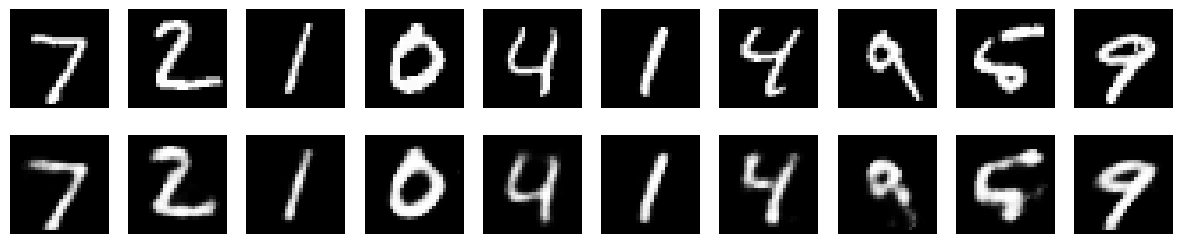

In [ ]:
# define linear autoencoder model 
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # encoder
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )
        # decoder
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


# load mnist dataset 
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# initialize the model, loss function, and optimizer
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# training 
num_epochs = 10
for epoch in range(num_epochs):
    for data, _ in train_loader:  
        # forward pass
        output = model(data)
        loss = criterion(output, data)

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# visualize original and reconstructed images
def visualize_reconstruction(model, loader):
    data, _ = next(iter(loader))
    with torch.no_grad():
        reconstructed = model(data)

    # plot original vs reconstructed
    fig, axes = plt.subplots(2, 10, figsize=(15, 3))
    for i in range(10):
        # original images
        axes[0, i].imshow(data[i].view(28, 28).numpy(), cmap='gray')
        axes[0, i].axis('off')

        # reconstructed images
        axes[1, i].imshow(reconstructed[i].view(28, 28).numpy(), cmap='gray')
        axes[1, i].axis('off')

    plt.show()

# plot certain images 
visualize_reconstruction(model, test_loader)